In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np


# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

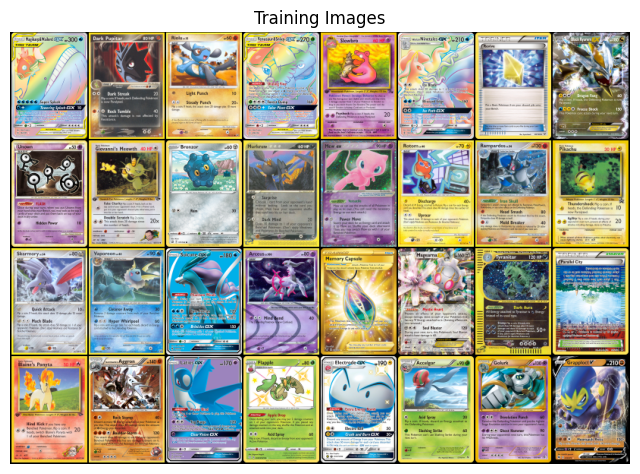

In [2]:
# We can use an image folder dataset the way we have it setup.
# Create the dataset
dataset = datasets.ImageFolder(root="resized2",
                           transform=transforms.Compose([
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                           ]))
# Create the dataloader
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32,
                                         shuffle=True, num_workers=1)

# Plot some training images
real_batch = next(iter(dataloader))
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(torchvision.utils.make_grid(real_batch[0].to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))
plt.show()

In [4]:
# Hyperparameters
latent_dim = 200
lr = 0.002
beta1 = 0.5
beta2 = 0.999
num_epochs = 10

In [27]:
# Define the generator
class Generator(nn.Module):
    def __init__(self, latent_dim):
        super(Generator, self).__init__()

        self.model = nn.Sequential(
            nn.Linear(latent_dim, 64 * 35 * 25),
            nn.ReLU(),
            nn.Unflatten(1, (64, 35, 25)),
            nn.Upsample(scale_factor=2),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64, momentum=0.78),
            nn.ReLU(),
            nn.Upsample(scale_factor=2),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64, momentum=0.78),
            nn.ReLU(),
            nn.Conv2d(64, 3, kernel_size=3, padding=1),
            nn.Tanh()
        )

    def forward(self, z):
        img = self.model(z)
        return img

In [28]:
# Define the discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()

        self.model = nn.Sequential(
        nn.Conv2d(3, 32, kernel_size=3, stride=2, padding=1),
        nn.ReLU(),
        nn.Dropout(0.25),
        nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1),
        nn.ZeroPad2d((0, 1, 0, 1)),
        nn.BatchNorm2d(64, momentum=0.82),
        nn.ReLU(),
        nn.Dropout(0.25),
        nn.Conv2d(64, 64, kernel_size=3, stride=2, padding=1),
        nn.BatchNorm2d(64, momentum=0.82),
        nn.ReLU(),
        nn.Dropout(0.25),
        nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(128, momentum=0.8),
        nn.ReLU(),
        nn.Dropout(0.25),
        nn.Flatten(),
        nn.Linear(128 * 13 * 18, 1),
        nn.Sigmoid()
    )

    def forward(self, img):
        validity = self.model(img)
        return validity

In [29]:
# Define the generator and discriminator
# Initialize generator and discriminator
generator = Generator(latent_dim).to(device)
discriminator = Discriminator().to(device)
# Loss function
adversarial_loss = nn.BCELoss()
# Optimizers
optimizer_G = optim.Adam(generator.parameters()\
                         , lr=lr, betas=(beta1, beta2))
optimizer_D = optim.Adam(discriminator.parameters()\
                         , lr=lr, betas=(beta1, beta2))

Epoch [1/10]                        Batch 10/425 Discriminator Loss: 4.2893 Generator Loss: 8.9588
Epoch [1/10]                        Batch 20/425 Discriminator Loss: 2.0962 Generator Loss: 12.2442
Epoch [1/10]                        Batch 30/425 Discriminator Loss: 1.3704 Generator Loss: 4.9496
Epoch [1/10]                        Batch 40/425 Discriminator Loss: 0.7893 Generator Loss: 2.1321
Epoch [1/10]                        Batch 50/425 Discriminator Loss: 0.6435 Generator Loss: 1.0222
Epoch [1/10]                        Batch 60/425 Discriminator Loss: 0.9038 Generator Loss: 1.5976
Epoch [1/10]                        Batch 70/425 Discriminator Loss: 0.8261 Generator Loss: 1.0816
Epoch [1/10]                        Batch 80/425 Discriminator Loss: 0.5644 Generator Loss: 0.5895
Epoch [1/10]                        Batch 90/425 Discriminator Loss: 0.9634 Generator Loss: 0.5393
Epoch [1/10]                        Batch 100/425 Discriminator Loss: 0.7637 Generator Loss: 0.7906
Epoch [1

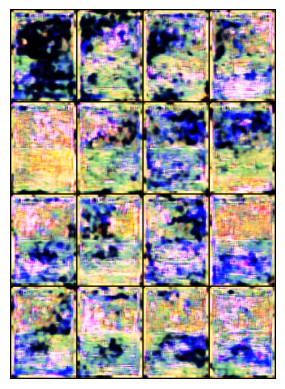

Epoch [2/10]                        Batch 10/425 Discriminator Loss: 0.8791 Generator Loss: 52.8690
Epoch [2/10]                        Batch 20/425 Discriminator Loss: 0.8010 Generator Loss: 2.0752
Epoch [2/10]                        Batch 30/425 Discriminator Loss: 0.4724 Generator Loss: 1.8432
Epoch [2/10]                        Batch 40/425 Discriminator Loss: 0.4032 Generator Loss: 1.5122
Epoch [2/10]                        Batch 50/425 Discriminator Loss: 0.3634 Generator Loss: 2.1980
Epoch [2/10]                        Batch 60/425 Discriminator Loss: 0.4189 Generator Loss: 1.7408
Epoch [2/10]                        Batch 70/425 Discriminator Loss: 0.4385 Generator Loss: 2.0999
Epoch [2/10]                        Batch 80/425 Discriminator Loss: 0.6478 Generator Loss: 3.6875
Epoch [2/10]                        Batch 90/425 Discriminator Loss: 0.4415 Generator Loss: 1.2063
Epoch [2/10]                        Batch 100/425 Discriminator Loss: 0.4041 Generator Loss: 1.7888
Epoch [2

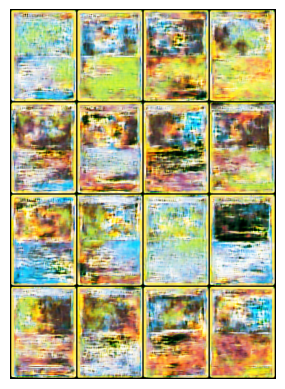

Epoch [3/10]                        Batch 10/425 Discriminator Loss: 0.3949 Generator Loss: 1.8380
Epoch [3/10]                        Batch 20/425 Discriminator Loss: 0.5222 Generator Loss: 1.1170
Epoch [3/10]                        Batch 30/425 Discriminator Loss: 0.3360 Generator Loss: 1.7704
Epoch [3/10]                        Batch 40/425 Discriminator Loss: 0.7489 Generator Loss: 1.6912
Epoch [3/10]                        Batch 50/425 Discriminator Loss: 0.3932 Generator Loss: 1.9097
Epoch [3/10]                        Batch 60/425 Discriminator Loss: 0.3659 Generator Loss: 2.9353
Epoch [3/10]                        Batch 70/425 Discriminator Loss: 0.4046 Generator Loss: 1.7172
Epoch [3/10]                        Batch 80/425 Discriminator Loss: 0.3451 Generator Loss: 2.0900
Epoch [3/10]                        Batch 90/425 Discriminator Loss: 0.4283 Generator Loss: 1.8832
Epoch [3/10]                        Batch 100/425 Discriminator Loss: 0.3605 Generator Loss: 1.9323
Epoch [3/

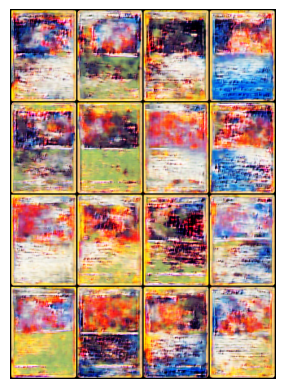

Epoch [4/10]                        Batch 10/425 Discriminator Loss: 0.3545 Generator Loss: 1.8779
Epoch [4/10]                        Batch 20/425 Discriminator Loss: 0.4122 Generator Loss: 2.2300
Epoch [4/10]                        Batch 30/425 Discriminator Loss: 0.3539 Generator Loss: 1.6813
Epoch [4/10]                        Batch 40/425 Discriminator Loss: 0.3828 Generator Loss: 1.6356
Epoch [4/10]                        Batch 50/425 Discriminator Loss: 0.3783 Generator Loss: 2.9227
Epoch [4/10]                        Batch 60/425 Discriminator Loss: 0.3648 Generator Loss: 1.5095
Epoch [4/10]                        Batch 70/425 Discriminator Loss: 0.3828 Generator Loss: 2.0550
Epoch [4/10]                        Batch 80/425 Discriminator Loss: 0.3458 Generator Loss: 2.0821
Epoch [4/10]                        Batch 90/425 Discriminator Loss: 0.3455 Generator Loss: 1.9493
Epoch [4/10]                        Batch 100/425 Discriminator Loss: 0.3723 Generator Loss: 1.8555
Epoch [4/

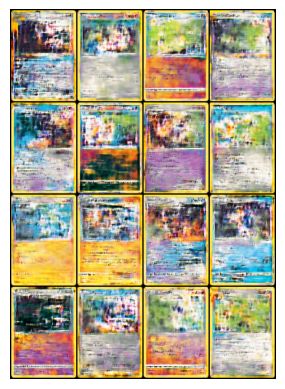

Epoch [5/10]                        Batch 10/425 Discriminator Loss: 0.5327 Generator Loss: 1.2097
Epoch [5/10]                        Batch 20/425 Discriminator Loss: 0.5734 Generator Loss: 1.1138
Epoch [5/10]                        Batch 30/425 Discriminator Loss: 0.5167 Generator Loss: 1.4850
Epoch [5/10]                        Batch 40/425 Discriminator Loss: 0.6061 Generator Loss: 2.1069
Epoch [5/10]                        Batch 50/425 Discriminator Loss: 0.5645 Generator Loss: 0.8983
Epoch [5/10]                        Batch 60/425 Discriminator Loss: 0.4884 Generator Loss: 1.5630
Epoch [5/10]                        Batch 70/425 Discriminator Loss: 0.4390 Generator Loss: 1.7753
Epoch [5/10]                        Batch 80/425 Discriminator Loss: 0.3861 Generator Loss: 1.4005
Epoch [5/10]                        Batch 90/425 Discriminator Loss: 0.3705 Generator Loss: 1.9054
Epoch [5/10]                        Batch 100/425 Discriminator Loss: 0.4606 Generator Loss: 1.3076
Epoch [5/

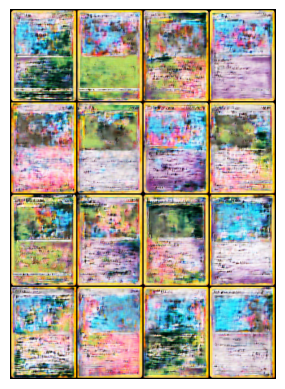

Epoch [6/10]                        Batch 10/425 Discriminator Loss: 0.4126 Generator Loss: 2.0929
Epoch [6/10]                        Batch 20/425 Discriminator Loss: 0.3707 Generator Loss: 2.4033
Epoch [6/10]                        Batch 30/425 Discriminator Loss: 0.3998 Generator Loss: 1.5187
Epoch [6/10]                        Batch 40/425 Discriminator Loss: 0.3476 Generator Loss: 1.5314
Epoch [6/10]                        Batch 50/425 Discriminator Loss: 0.3329 Generator Loss: 1.9018
Epoch [6/10]                        Batch 60/425 Discriminator Loss: 0.3784 Generator Loss: 1.5985
Epoch [6/10]                        Batch 70/425 Discriminator Loss: 0.3975 Generator Loss: 2.6002
Epoch [6/10]                        Batch 80/425 Discriminator Loss: 0.3651 Generator Loss: 1.8963
Epoch [6/10]                        Batch 90/425 Discriminator Loss: 0.3881 Generator Loss: 1.6228
Epoch [6/10]                        Batch 100/425 Discriminator Loss: 0.4010 Generator Loss: 1.8277
Epoch [6/

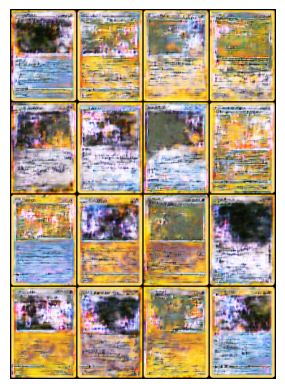

Epoch [7/10]                        Batch 10/425 Discriminator Loss: 0.3526 Generator Loss: 2.0669
Epoch [7/10]                        Batch 20/425 Discriminator Loss: 0.4503 Generator Loss: 3.3639
Epoch [7/10]                        Batch 30/425 Discriminator Loss: 0.3661 Generator Loss: 1.9351
Epoch [7/10]                        Batch 40/425 Discriminator Loss: 0.3398 Generator Loss: 1.8652
Epoch [7/10]                        Batch 50/425 Discriminator Loss: 0.3477 Generator Loss: 2.0180
Epoch [7/10]                        Batch 60/425 Discriminator Loss: 0.3538 Generator Loss: 2.2703
Epoch [7/10]                        Batch 70/425 Discriminator Loss: 0.3542 Generator Loss: 2.0649
Epoch [7/10]                        Batch 80/425 Discriminator Loss: 0.3547 Generator Loss: 2.3413
Epoch [7/10]                        Batch 90/425 Discriminator Loss: 0.3850 Generator Loss: 1.9707
Epoch [7/10]                        Batch 100/425 Discriminator Loss: 0.4090 Generator Loss: 1.6419
Epoch [7/

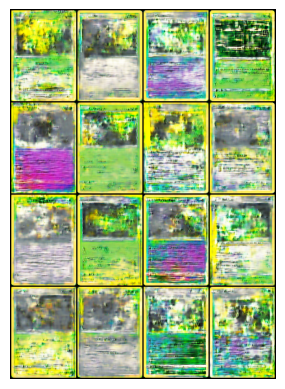

Epoch [8/10]                        Batch 10/425 Discriminator Loss: 0.3356 Generator Loss: 2.1910
Epoch [8/10]                        Batch 20/425 Discriminator Loss: 0.3214 Generator Loss: 2.0993
Epoch [8/10]                        Batch 30/425 Discriminator Loss: 0.3365 Generator Loss: 1.8304
Epoch [8/10]                        Batch 40/425 Discriminator Loss: 0.3674 Generator Loss: 2.1211
Epoch [8/10]                        Batch 50/425 Discriminator Loss: 0.3388 Generator Loss: 1.8596
Epoch [8/10]                        Batch 60/425 Discriminator Loss: 0.3303 Generator Loss: 2.2555
Epoch [8/10]                        Batch 70/425 Discriminator Loss: 0.3508 Generator Loss: 1.9711
Epoch [8/10]                        Batch 80/425 Discriminator Loss: 0.4303 Generator Loss: 2.0127
Epoch [8/10]                        Batch 90/425 Discriminator Loss: 0.3309 Generator Loss: 2.1244
Epoch [8/10]                        Batch 100/425 Discriminator Loss: 0.3282 Generator Loss: 1.9992
Epoch [8/

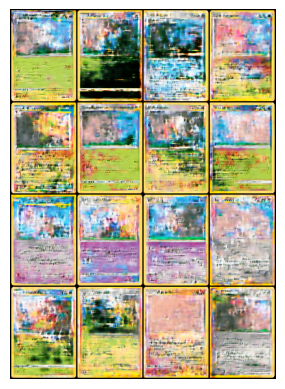

Epoch [9/10]                        Batch 10/425 Discriminator Loss: 0.6330 Generator Loss: 1.2920
Epoch [9/10]                        Batch 20/425 Discriminator Loss: 0.5473 Generator Loss: 1.4106
Epoch [9/10]                        Batch 30/425 Discriminator Loss: 0.5129 Generator Loss: 1.7837
Epoch [9/10]                        Batch 40/425 Discriminator Loss: 0.5038 Generator Loss: 2.0732
Epoch [9/10]                        Batch 50/425 Discriminator Loss: 0.3667 Generator Loss: 1.9053
Epoch [9/10]                        Batch 60/425 Discriminator Loss: 0.4670 Generator Loss: 0.9235
Epoch [9/10]                        Batch 70/425 Discriminator Loss: 0.5347 Generator Loss: 1.9128
Epoch [9/10]                        Batch 80/425 Discriminator Loss: 0.4620 Generator Loss: 1.8344
Epoch [9/10]                        Batch 90/425 Discriminator Loss: 0.3853 Generator Loss: 2.1039
Epoch [9/10]                        Batch 100/425 Discriminator Loss: 0.3565 Generator Loss: 1.5525
Epoch [9/

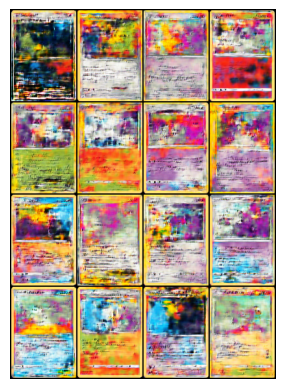

Epoch [10/10]                        Batch 10/425 Discriminator Loss: 0.5413 Generator Loss: 3.6866
Epoch [10/10]                        Batch 20/425 Discriminator Loss: 0.3880 Generator Loss: 1.6737
Epoch [10/10]                        Batch 30/425 Discriminator Loss: 0.3614 Generator Loss: 1.8924
Epoch [10/10]                        Batch 40/425 Discriminator Loss: 0.3311 Generator Loss: 2.1352
Epoch [10/10]                        Batch 50/425 Discriminator Loss: 0.3820 Generator Loss: 2.0184
Epoch [10/10]                        Batch 60/425 Discriminator Loss: 0.3644 Generator Loss: 1.7811
Epoch [10/10]                        Batch 70/425 Discriminator Loss: 0.3762 Generator Loss: 1.9138
Epoch [10/10]                        Batch 80/425 Discriminator Loss: 0.3682 Generator Loss: 1.8421
Epoch [10/10]                        Batch 90/425 Discriminator Loss: 0.4178 Generator Loss: 1.7232
Epoch [10/10]                        Batch 100/425 Discriminator Loss: 0.3578 Generator Loss: 2.2719

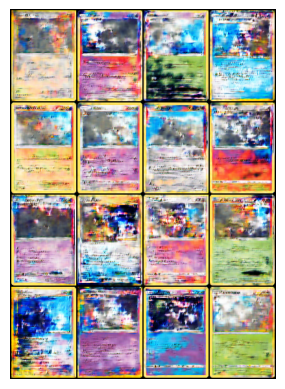

In [30]:
# Training loop
for epoch in range(num_epochs):
    for i, batch in enumerate(dataloader):
       # Convert list to tensor
        real_images = batch[0].to(device) 
        # Adversarial ground truths
        valid = torch.zeros(real_images.size(0), 1, device=device) + torch.rand(real_images.size(0), 1, device=device)*0.2
        fake = torch.ones(real_images.size(0), 1, device=device) - torch.rand(real_images.size(0), 1, device=device)*0.2
        # Configure input
        real_images = real_images.to(device)

        # ---------------------
        #  Train Discriminator
        # ---------------------
        optimizer_D.zero_grad()
        # Sample noise as generator input
        z = torch.randn(real_images.size(0), latent_dim, device=device)
        # Generate a batch of images
        fake_images = generator(z)

        # Measure discriminator's ability 
        # to classify real and fake images
        real_loss = adversarial_loss(discriminator\
                                     (real_images), valid)
        fake_loss = adversarial_loss(discriminator\
                                     (fake_images.detach()), fake)
        d_loss = (real_loss + fake_loss) / 2
        # Backward pass and optimize
        d_loss.backward()
        optimizer_D.step()

        # -----------------
        #  Train Generator
        # -----------------

        optimizer_G.zero_grad()
        # Generate a batch of images
        gen_images = generator(z)
        # Adversarial loss
        g_loss = adversarial_loss(discriminator(gen_images), valid)
        # Backward pass and optimize
        g_loss.backward()
        optimizer_G.step()
        # ---------------------
        #  Progress Monitoring
        # ---------------------
        if (i + 1) % 10 == 0:
            print(
                f"Epoch [{epoch+1}/{num_epochs}]\
                        Batch {i+1}/{len(dataloader)} "
                f"Discriminator Loss: {d_loss.item():.4f} "
                f"Generator Loss: {g_loss.item():.4f}"
            )
    # Save generated images for every epoch
    if (epoch + 1) % 1 == 0:
        with torch.no_grad():
            z = torch.randn(16, latent_dim, device=device)
            generated = generator(z).detach().cpu()
            grid = torchvision.utils.make_grid(generated,\
                                        nrow=4, normalize=True)
            plt.imshow(np.transpose(grid, (1, 2, 0)))
            plt.axis("off")
            plt.show()